In [0]:
import cv2
from PIL import Image

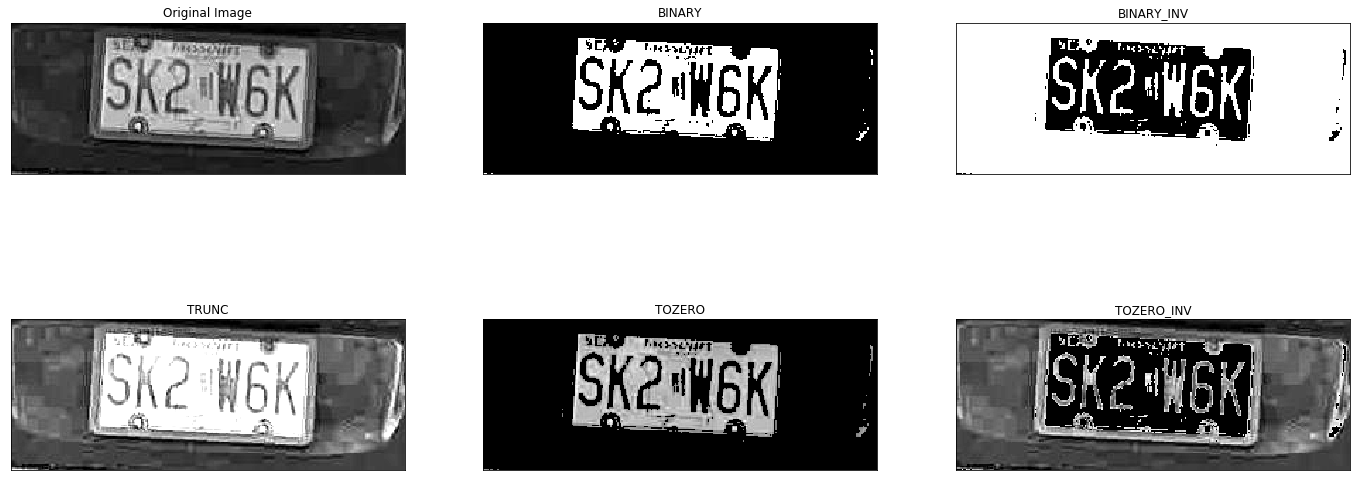

In [0]:
import cv2 as cv
import cv2 
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/outcut_wts-lg-000028.jpg',0)
ret,thresh1 = cv.threshold(img,135,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(24,10))
for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

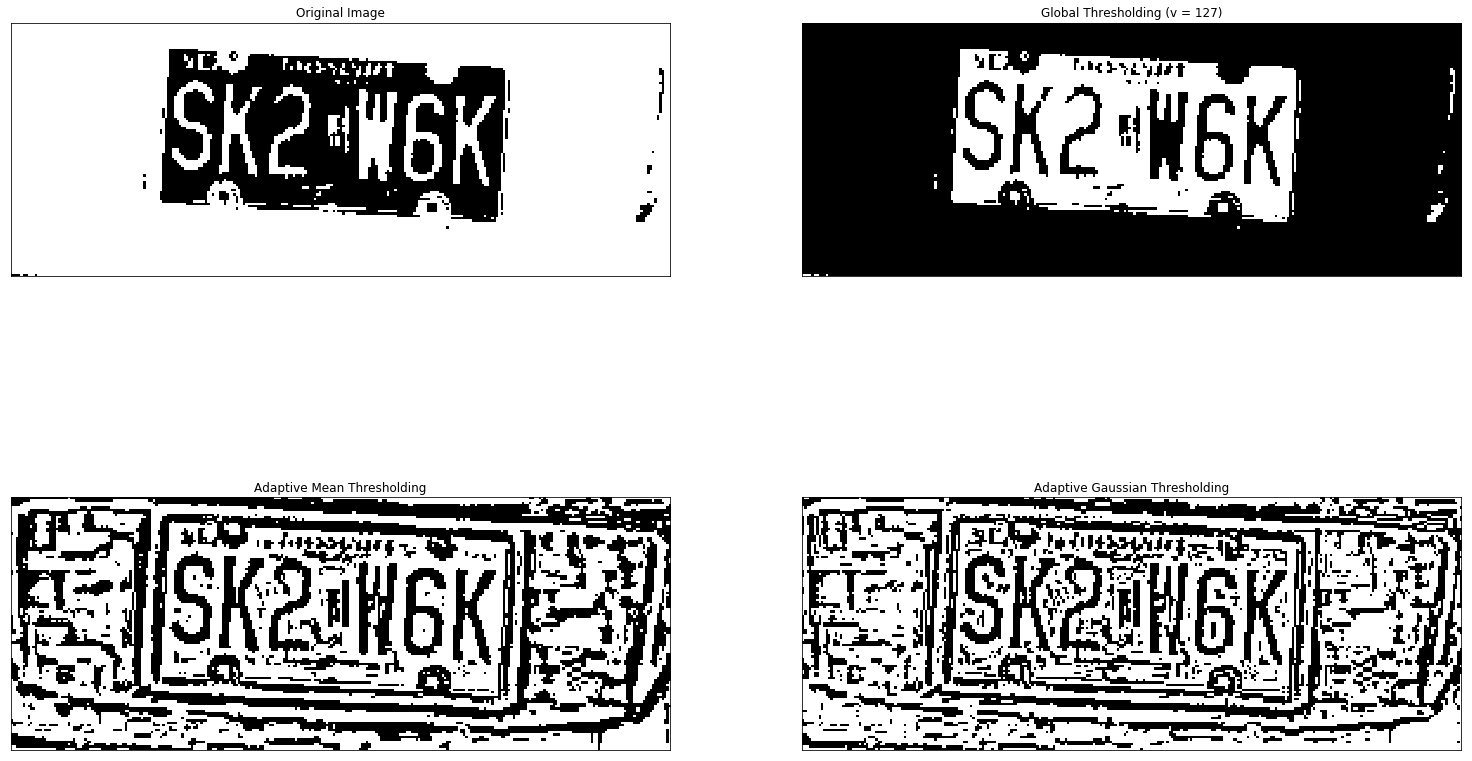

In [0]:
#img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [thresh2,th1,th2,th3]
plt.figure(figsize=(26,16))
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

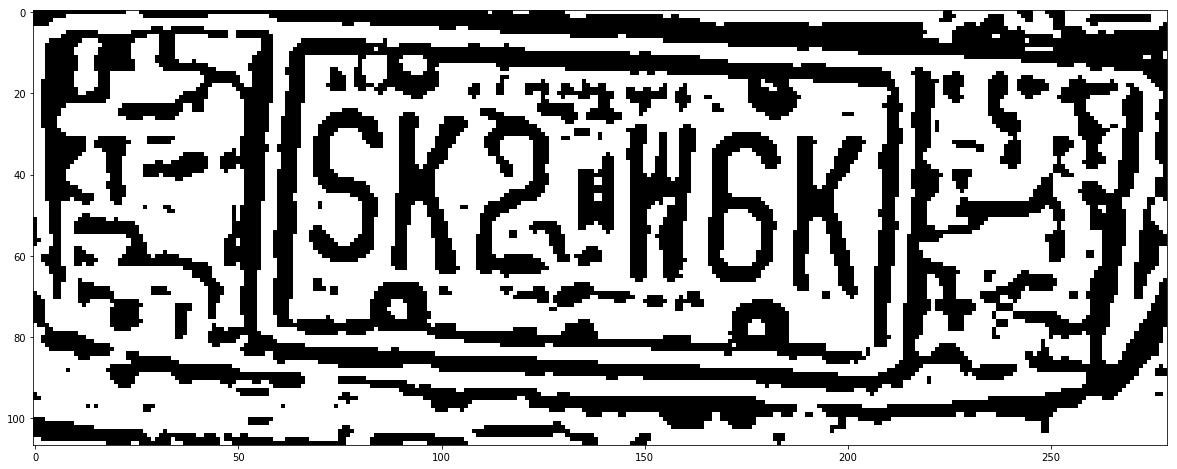

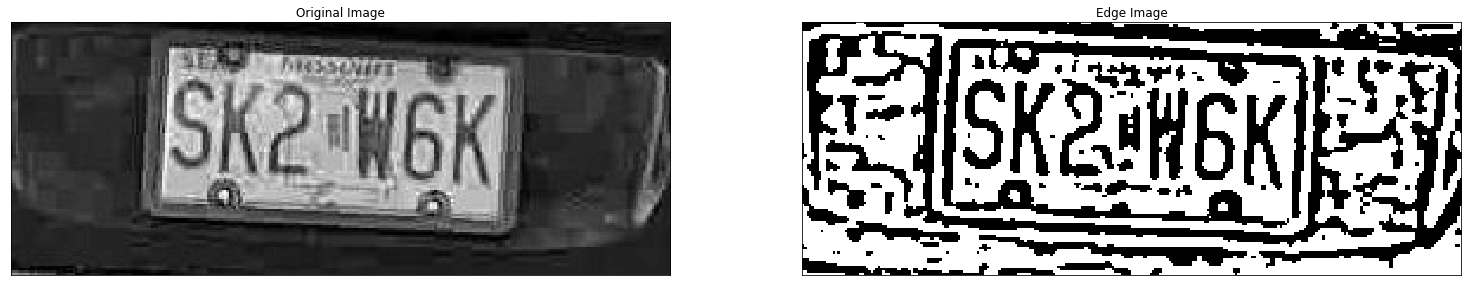

In [0]:
edges = cv2.medianBlur(th2,3)
plt.figure(figsize=(26,8))
plt.imshow(edges,cmap = 'gray')
# for i in range(1):
#   edges = cv2.erode(edges, None, iterations=1)
#   edges = cv2.dilate(edges, None, iterations=1)
plt.figure(figsize=(26,8))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

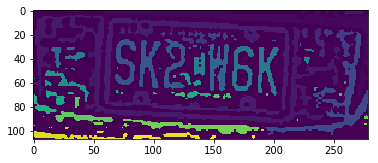

In [0]:
import pandas as pd
inversed_edges = ~ edges
N, output, stats, centroids = cv2.connectedComponentsWithStats(inversed_edges)
index = ['left_edge','top_edge','width','height','area']
stats = pd.DataFrame(data=stats,columns=index)
clusters = np.unique(output)


plt.imshow(output)

In [0]:
print(stats)
print(clusters)

In [0]:
stats.iloc[7]

In [0]:
big = stats.index[stats['area']>200 ].tolist()
#big.remove(1)
#big = stats.index[stats['area'] < 1000 ].tolist()


ValueError: ignored

0

[0, 2, 6, 7, 19, 22, 23, 24, 28, 33, 34, 68]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]
[ 0  2  6  7 19 22 23 24 28 33 34 68]


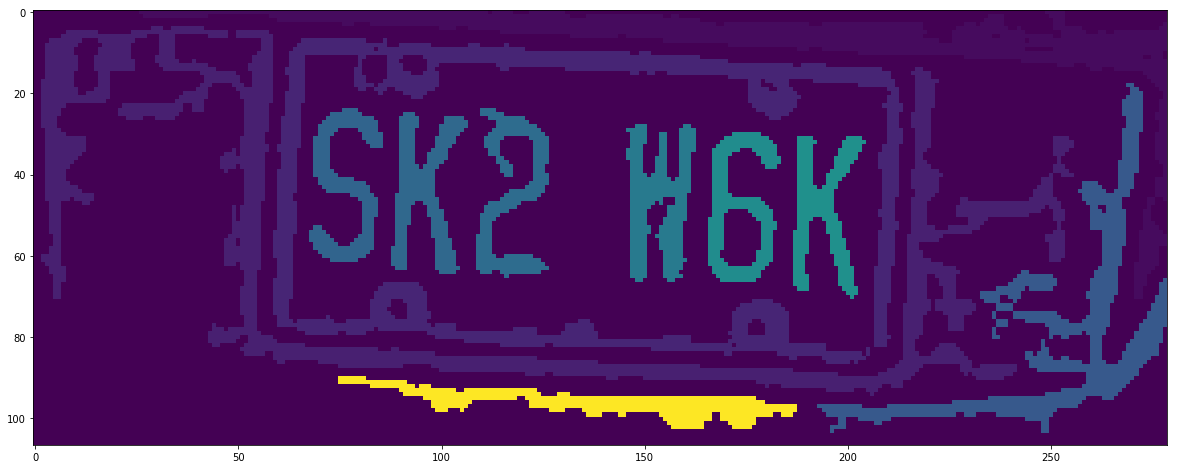

In [0]:
print(big)
print(np.unique(output))
clean = np.where(np.isin(output,big[1:]) , output, 0)
print(np.unique(clean))
plt.figure(figsize=(26,8))
plt.imshow(clean)
plt.show()

In [0]:
stats = stats.iloc[big]

In [0]:

top = stats.loc[stats[1:]['top_edge'].idxmin()]['top_edge']
left = stats.loc[stats[1:]['left_edge'].idxmin()]['left_edge']
right = stats.loc[stats[1:]['left_edge'].idxmax()]['left_edge'] + stats.loc[stats[1:]['left_edge'].idxmax()]['width']
bottom = top + stats.loc[stats[1:]['top_edge'].idxmax()]['height']
padding = 20
padded = np.pad(clean[top:bottom,left:right],padding,'constant',constant_values=0)
plt.figure(figsize=(16,8))
plt.imshow(padded)
plt.show()

In [0]:
Image.fromarray((padded * 255).astype(np.uint8)).save('letters.jpg')